Predicting House Prices Using the Boston Housing Dataset


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('BostonHousing.csv')

Data Preprocessing:
Normalize numerical features and preprocess categorical variables.


In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [6]:
data['rm'].fillna(data['rm'].mean(), inplace=True)

<ipython-input-6-a658fef8d69f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rm'].fillna(data['rm'].mean(), inplace=True)


In [7]:
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
X = data.drop('medv', axis=1)  # Features
y = data['medv']  # Target variable

Model Implementation:
Implement Linear Regression, Random Forest, and XGBoost models from scratch

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print("\nLinear Regression Performance:")
print(f"Mean Absolute Error: {linear_mae}")
print(f"R² Score: {linear_r2}")


Linear Regression Performance:
Mean Absolute Error: 3.2064039639003603
R² Score: 0.6672089705941906


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Performance:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R^2 Score: {rf_r2}")



Random Forest Performance:
Mean Absolute Error: 2.03757843137255
R^2 Score: 0.8938925836173701


In [12]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\nXGBoost Performance:")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"R^2 Score: {xgb_r2}")


XGBoost Performance:
Mean Absolute Error: 1.958836310517554
R^2 Score: 0.9015764794125712


Performance Comparison:
Compare the models using R² metrics.

In [13]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_y_pred = linear_model.predict(X_test)

# Evaluate the model
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print("\nLinear Regression Performance:")
print(f"Mean Absolute Error: {linear_mae}")
print(f"R^2 Score: {linear_r2}")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Performance:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R^2 Score: {rf_r2}")

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\nXGBoost Performance:")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"R^2 Score: {xgb_r2}")



Linear Regression Performance:
Mean Absolute Error: 3.2064039639003603
R^2 Score: 0.6672089705941906

Random Forest Performance:
Mean Absolute Error: 2.03757843137255
R^2 Score: 0.8938925836173701

XGBoost Performance:
Mean Absolute Error: 1.958836310517554
R^2 Score: 0.9015764794125712


Feature Importance:
Visualize feature importance for tree-based models.


<Figure size 1000x600 with 0 Axes>

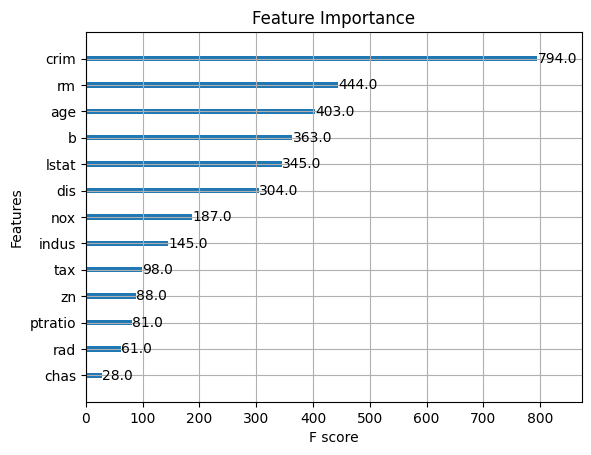

In [14]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming `xgb_model` is your trained XGBoost model
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')  # or 'gain', 'cover'
plt.title("Feature Importance")
plt.show()


<ipython-input-15-52113f3d60e1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


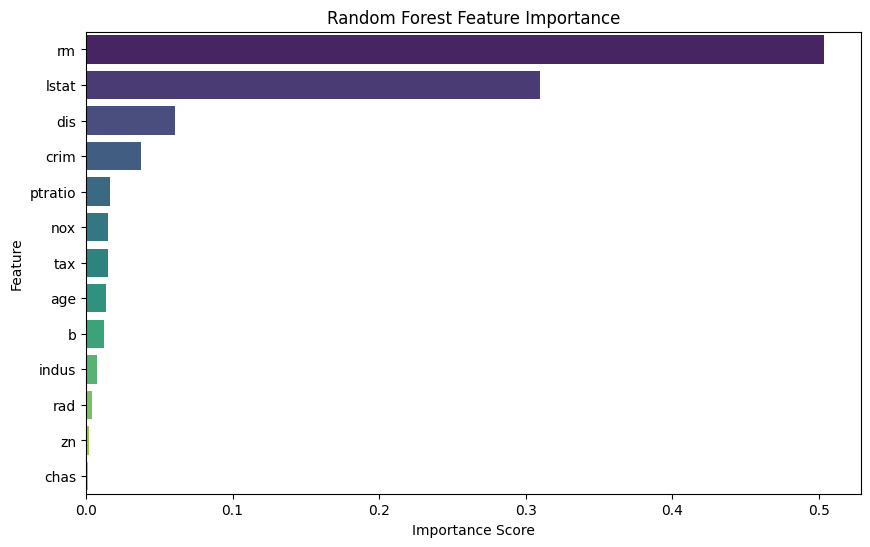

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `rf_model` is your trained Random Forest model
importance = rf_model.feature_importances_
features = X_train.columns  # Replace with your feature names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


<ipython-input-17-38a8445d4248>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Abs_Coefficient', y='Feature', palette='coolwarm')


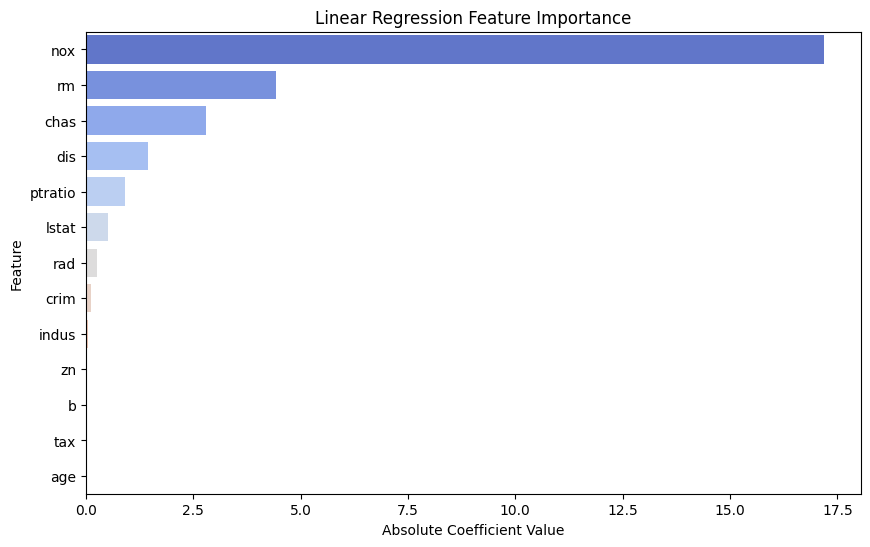

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Added import for np

# Assuming `linear_model` is your trained Linear Regression model
coefficients = linear_model.coef_ # Changed lr_model to linear_model
features = X_train.columns  # Replace with your feature names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])  # Use absolute value for ranking
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Abs_Coefficient', y='Feature', palette='coolwarm')
plt.title('Linear Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()